In [4]:
import numpy as np

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 200

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sb
from scipy import stats

In [5]:
counties_df = pd.read_csv('us_counties.csv',dtype={0:str},na_values=['-'])
counties_df.rename(columns={'Unnamed: 0':'FIPS'},inplace=True)
counties_df.rename(columns = {"Pct_Single_Female":"Unemployment_rate_2020"})
counties_df.set_index('FIPS',inplace=True)
print(counties_df.shape)
counties_df.head()

(3297, 33)


,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982.0,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756.0,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990.0,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721.0,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922.0,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982


In [6]:
co_counties = counties_df.copy()[counties_df['state'] == 'Colorado']

print(co_counties.shape)

co_counties.head()

(64, 33)


,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
08001,41.4,40.4,-1.0,Colorado,Adams,132138.0,1315.0,22.9,29.0,25.2,6.9,10.9,84.2,51.8,20.7,70.2,72.1,88.3,0.1,4.1,73817.0,8.4,89.7,7.4,509844.0,26.5,10.5,49.5,84.3,40.4,88.3,0.259173,0.002579
08003,43.9,48.8,4.9,Colorado,Alamosa,4480.0,60.0,27.4,28.2,24.5,5.5,17.6,82.5,60.9,9.4,87.1,72.3,78.9,0.0,6.9,41121.0,21.6,88.7,14.0,16153.0,24.2,13.9,50.6,86.1,47.1,93.9,0.277348,0.003714
08005,38.6,36.4,-2.2,Colorado,Arapahoe,150770.0,1240.0,25.6,20.4,43.4,7.7,9.6,82.5,40.7,25.7,37.9,76.7,91.8,0.4,4.4,80291.0,6.1,92.1,5.2,649980.0,23.5,13.1,50.4,75.2,19.5,90.5,0.231961,0.001908
08007,58.1,56.7,-1.4,Colorado,Archuleta,2851.0,15.0,19.5,21.2,39.7,9.7,15.5,89.7,31.3,18.8,52.6,92.6,85.7,0.1,4.3,55658.0,6.3,87.5,5.0,13588.0,17.5,25.8,50.6,84.5,18.4,98.0,0.209817,0.001104
08009,81.4,83.9,2.5,Colorado,Baca,827.0,8.0,25.1,29.9,21.9,8.7,18.9,88.4,53.0,32.1,58.3,94.6,74.8,0.2,1.5,34655.0,13.8,92.0,14.4,3570.0,20.9,26.3,49.9,94.9,11.3,96.4,0.231653,0.002241


In [7]:
counties_df.rename(columns = {"Pct_Single_Female":"Unemployment_rate_2020"})


,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Unemployment_rate_2020,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982.0,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756.0,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990.0,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721.0,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922.0,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,16842.0,4154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,28068.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,19364.0,423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
biggest_co_counties = co_counties.sort_values('Population',ascending=False)['county'].head(10).values
biggest_co_counties

array(['Denver', 'El Paso', 'Arapahoe', 'Jefferson', 'Adams', 'Larimer',
       'Douglas', 'Boulder', 'Weld', 'Pueblo'], dtype=object)

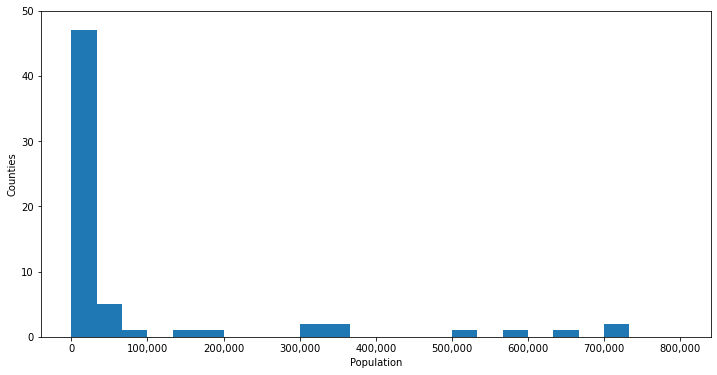

In [9]:
ax = co_counties['Population'].hist(bins=np.linspace(0,8e5,25),figsize=(12,6))
ax.set_ylim((0,50))
ax.grid(None)
ax.set_xlabel('Population')
ax.set_ylabel('Counties')

# https://stackoverflow.com/a/46574866/1574687
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

Text(0, 0.5, 'COVID-19 cases per capita')

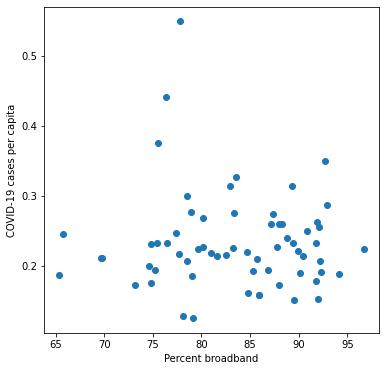

In [10]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the pandas Series to the x and y arguments
ax.scatter(
    x = co_counties['Pct_Broadband'],
    y = co_counties['covid_cases_percapita']
)

ax.set_xlabel('Percent broadband')
ax.set_ylabel('COVID-19 cases per capita')

<AxesSubplot:xlabel='Pct_Live_Same_House_1YA', ylabel='covid_cases_percapita'>

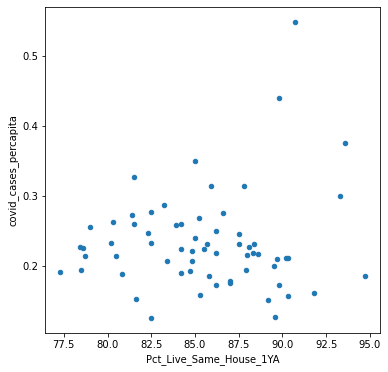

In [11]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments
co_counties.plot.scatter(
    x = 'Pct_Live_Same_House_1YA',
    y = 'covid_cases_percapita',
    ax = ax
)

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

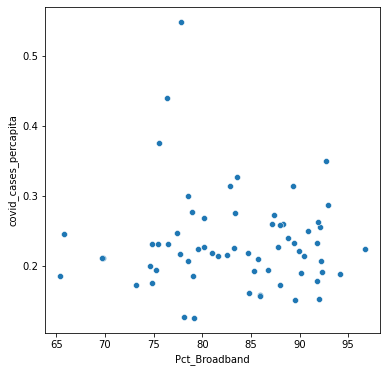

In [12]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments with the DataFrame
sb.scatterplot(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    data = co_counties,
    ax = ax
)

<AxesSubplot:xlabel='Pct_Live_Same_House_1YA', ylabel='covid_cases_percapita'>

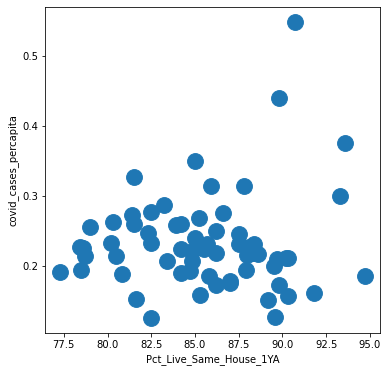

In [13]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments
co_counties.plot.scatter(
    x = 'Pct_Live_Same_House_1YA',
    y = 'covid_cases_percapita',
    s = 250,
    ax = ax
)

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

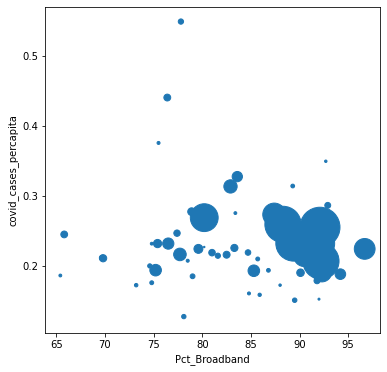

In [14]:
f,ax = plt.subplots(figsize=(6,6))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    ax = ax
)

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

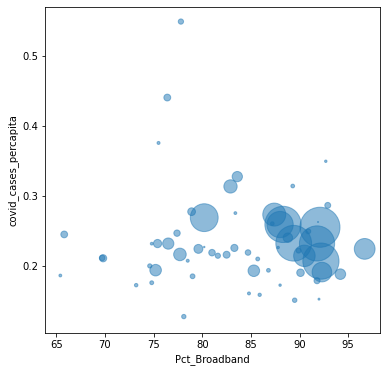

In [15]:
f,ax = plt.subplots(figsize=(6,6))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    alpha = .5,
    ax = ax
)

Change the colors of the points based on a value.

Text(0, 0.5, 'Trump 2020 voteshare')

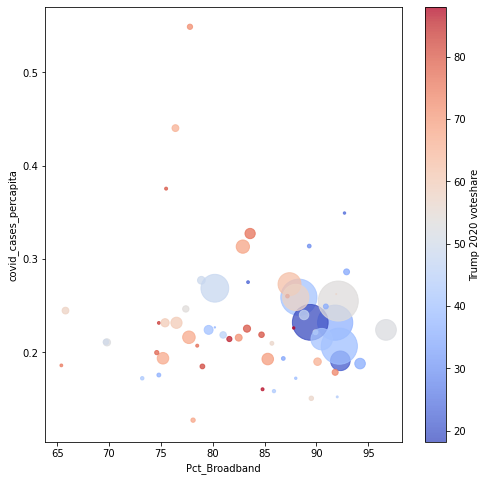

In [16]:
f,ax = plt.subplots(figsize=(8,8))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    c = co_counties['trump_2020'], # Have to pass as a Series, not a string
    alpha = .75,
    cmap = 'coolwarm',
    ax = ax
)

# We started with one axes, but added a colorbar axes as a second
cbar = f.get_axes()[-1]
cbar.set_ylabel('Trump 2020 voteshare')

Annotate each value with the name of the county.

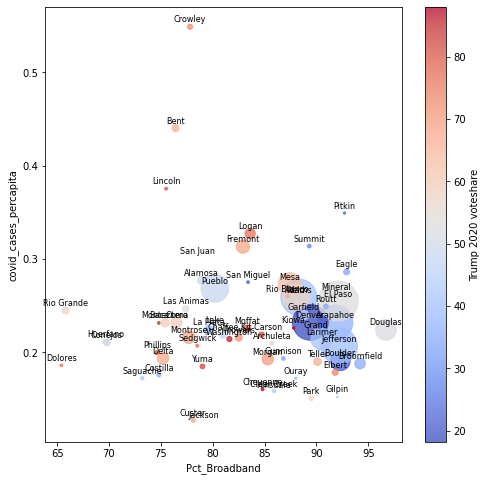

In [17]:
f,ax = plt.subplots(figsize=(8,8))

co_counties.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    s = 'covid_deaths',
    c = co_counties['trump_2020'], # Have to pass as a Series, not a string
    alpha = .75,
    cmap = 'coolwarm',
    ax = ax
)

# We started with one axes, but added a colorbar axes as a second
cbar = f.get_axes()[-1]
cbar.set_ylabel('Trump 2020 voteshare')

# Convert the Series to a dictionary and loop through each point
for fips, name in co_counties['county'].to_dict().items():
    # Get the x and y values
    x = co_counties.loc[fips,'Pct_Broadband']
    y = co_counties.loc[fips,'covid_cases_percapita']

    # Make the annotation adding a bit of space and centering the labels
    ax.annotate(name,(x,y+.005),ha='center',fontsize=8)

Seaborn handles this a bit differently.

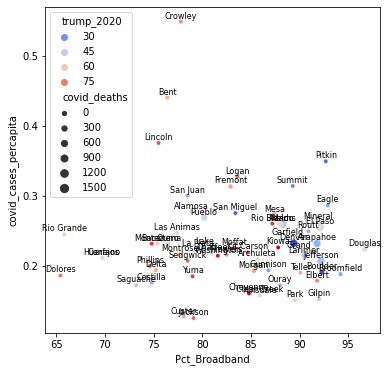

In [18]:
f,ax = plt.subplots(figsize=(6,6))

# Pass the column names as strings to the x and y arguments with the DataFrame
sb.scatterplot(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    hue = 'trump_2020',
    size = 'covid_deaths',
    palette = 'coolwarm',
    data = co_counties,
    ax = ax
)

# Convert the Series to a dictionary and loop through each point
for fips, name in co_counties['county'].to_dict().items():
    # Get the x and y values
    x = co_counties.loc[fips,'Pct_Broadband']
    y = co_counties.loc[fips,'covid_cases_percapita']
    
    # Make the annotation adding a bit of space and centering the labels
    ax.annotate(name,(x,y+.005),ha='center',fontsize=8)

In [19]:
co_counties['Scaled_Population'] = co_counties['Population']**.5

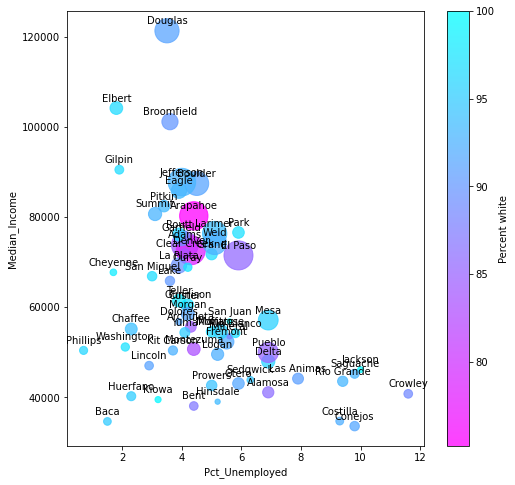

In [20]:
f,ax = plt.subplots(figsize=(8,8))

co_counties.plot.scatter(
    x = 'Pct_Unemployed',
    y = 'Median_Income',
    s = 'Scaled_Population',
    c = co_counties['Pct_White'], # Have to pass as a Series, not a string
    alpha = .75,
    cmap = 'cool_r',
    ax = ax
)

# We started with one axes, but added a colorbar axes as a second
cbar = f.get_axes()[-1]
cbar.set_ylabel('Percent white')

# Convert the Series to a dictionary and loop through each point
for fips, name in co_counties['county'].to_dict().items():
    # Get the x and y values
    x = co_counties.loc[fips,'Pct_Unemployed']
    y = co_counties.loc[fips,'Median_Income']
    
    # Make the annotation adding a bit of space and centering the labels
    ax.annotate(name,(x,y+1500),ha='center')

<AxesSubplot:xlabel='Pct_Broadband', ylabel='covid_cases_percapita'>

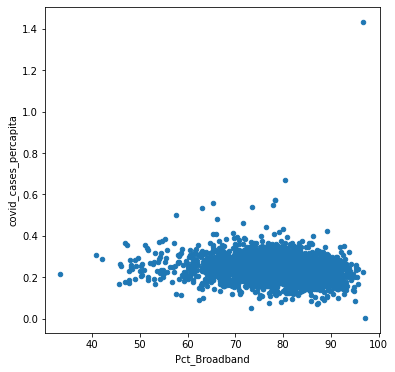

In [21]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Broadband',
    y = 'covid_cases_percapita',
    ax = ax
)

<AxesSubplot:xlabel='covid_cases_percapita', ylabel='Pct_Broadband'>

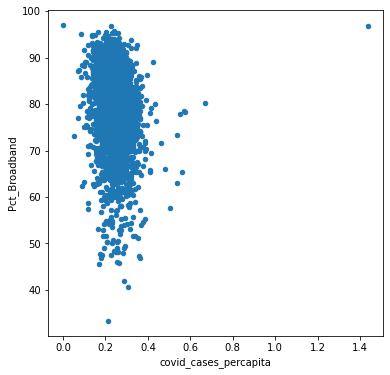

In [22]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'covid_cases_percapita',
    y = 'Pct_Broadband',
    ax = ax
)

<AxesSubplot:>

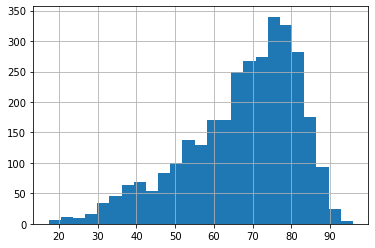

In [23]:
counties_df['Pct_Born_Same_State'].hist(bins=25)

<AxesSubplot:>

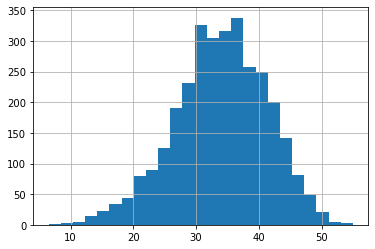

In [24]:
counties_df['Pct_HS_Grad'].hist(bins=25)

<AxesSubplot:xlabel='Pct_Born_Same_State', ylabel='Pct_HS_Grad'>

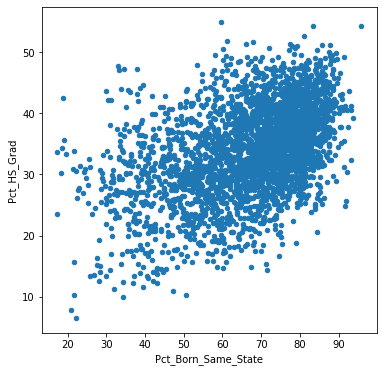

In [25]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    ax = ax
)

Let's plot the same relationship but swap the axes.

<AxesSubplot:xlabel='Pct_HS_Grad', ylabel='Pct_Born_Same_State'>

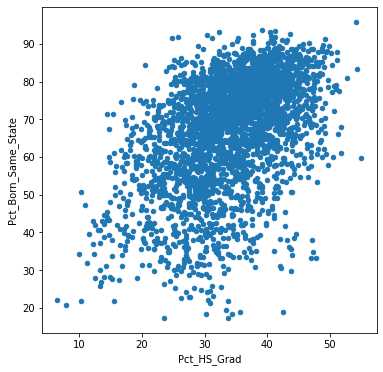

In [26]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_HS_Grad',
    y = 'Pct_Born_Same_State',
    ax = ax
)

In [27]:
counties_df.corr().loc['Pct_HS_Grad','Pct_Born_Same_State']

0.4605564519125698

<AxesSubplot:xlabel='Pct_Single_Female', ylabel='Pct_Family_Poverty'>

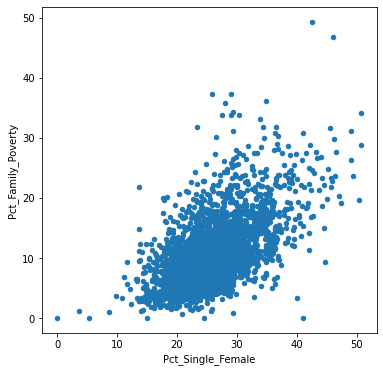

In [28]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Single_Female',
    y = 'Pct_Family_Poverty',
    ax = ax
)

<AxesSubplot:>

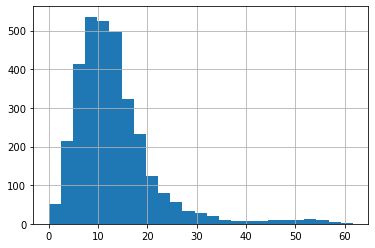

In [29]:
counties_df['Pct_Assistance'].hist(bins=25)

<AxesSubplot:>

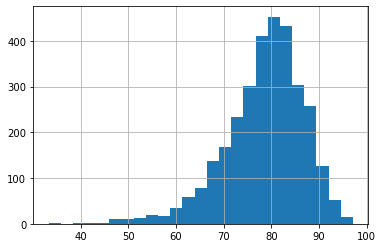

In [30]:
counties_df['Pct_Broadband'].hist(bins=25)

<AxesSubplot:xlabel='Pct_Assistance', ylabel='Pct_Broadband'>

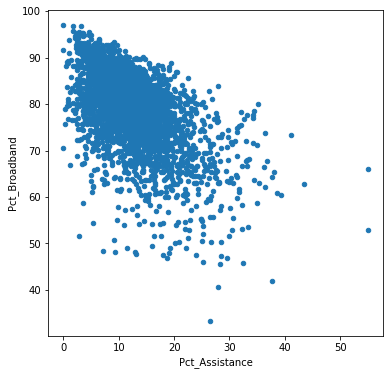

In [31]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Assistance',
    y = 'Pct_Broadband',
    ax = ax
)

In [32]:
counties_df.corr().loc['Pct_Assistance','Pct_Broadband']

-0.5431165371766581

<AxesSubplot:xlabel='Pct_English_Only', ylabel='Pct_Hispanic'>

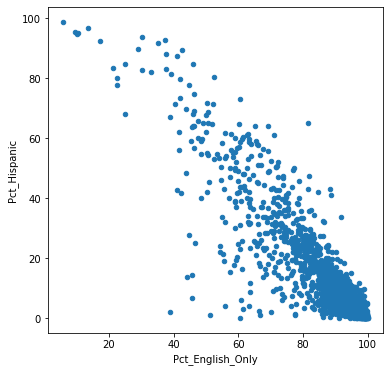

In [33]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_English_Only',
    y = 'Pct_Hispanic',
    ax = ax
)

In [34]:
counties_df.corr().loc['Pct_English_Only','Pct_Hispanic']

-0.8987254344567821

<AxesSubplot:>

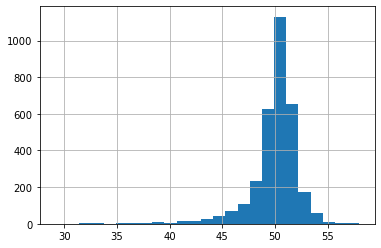

In [35]:
counties_df['Pct_Female'].hist(bins=25)

<AxesSubplot:>

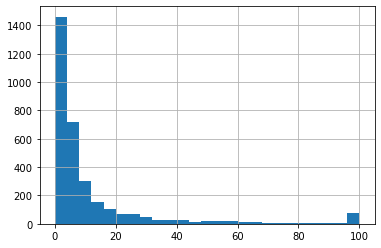

In [36]:
counties_df['Pct_Hispanic'].hist(bins=25)

<AxesSubplot:xlabel='Pct_Female', ylabel='Pct_Hispanic'>

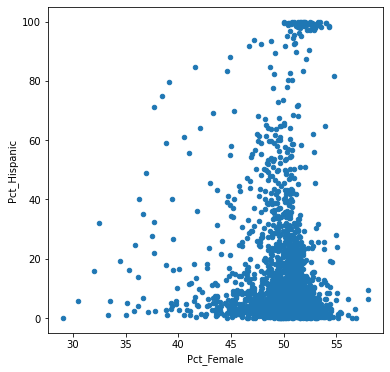

In [37]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Female',
    y = 'Pct_Hispanic',
    ax = ax
)

<AxesSubplot:>

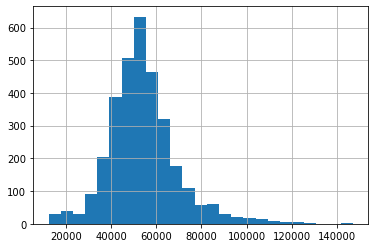

In [38]:
counties_df['Median_Income'].hist(bins=25)

<AxesSubplot:>

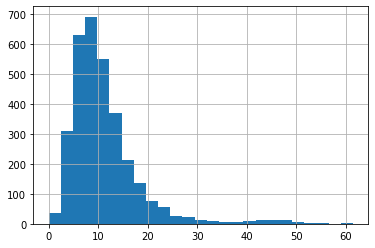

In [39]:
counties_df['Pct_Family_Poverty'].hist(bins=25)

<AxesSubplot:xlabel='Median_Income', ylabel='Pct_Family_Poverty'>

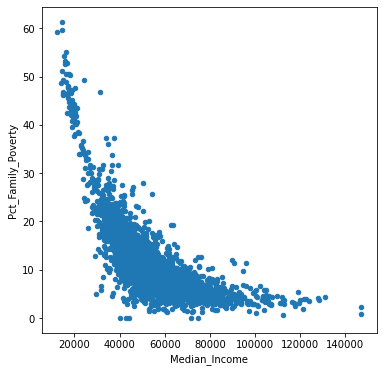

In [40]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Median_Income',
    y = 'Pct_Family_Poverty',
    ax = ax
)

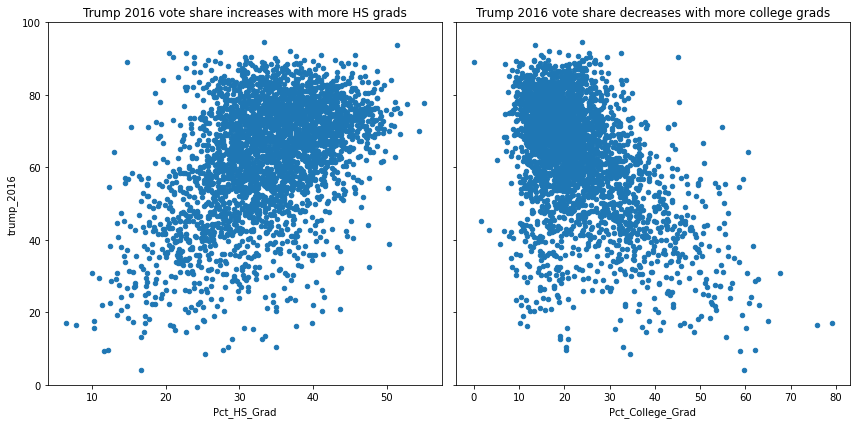

In [41]:
f,axs = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (12,6),
    sharey = True,
    subplot_kw = {'ylim':(0,100)}
)

counties_df.plot.scatter(
    x = 'Pct_HS_Grad',
    y = 'trump_2016',
    ax = axs[0]
)

counties_df.plot.scatter(
    x = 'Pct_College_Grad',
    y = 'trump_2016',
    ax = axs[1]
)

axs[0].set_title('Trump 2016 vote share increases with more HS grads')
axs[1].set_title('Trump 2016 vote share decreases with more college grads')

f.tight_layout()

In [42]:
model = stats.linregress(
    x = counties_df['Pct_Born_Same_State'].fillna(0),
    y = counties_df['Pct_HS_Grad'].fillna(0),
)

model

LinregressResult(slope=0.37176150098847005, intercept=8.523122270767207, rvalue=0.7343720817551875, pvalue=0.0, stderr=0.005985887380408478, intercept_stderr=0.40127583157758684)

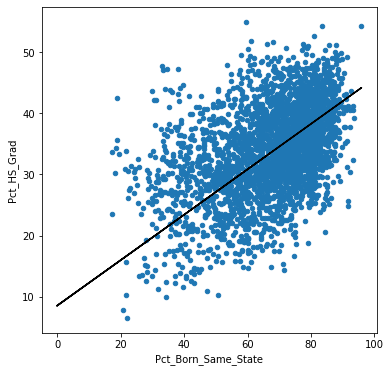

In [43]:
f,ax = plt.subplots(figsize=(6,6))

counties_df.plot.scatter(
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    ax = ax
)

_x = counties_df['Pct_Born_Same_State'].fillna(0)
ax.plot(_x,model.intercept + model.slope*_x,color='k')

Seaborn's `lmplot` ([docs](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) will also make a scatterplot with a linear model estimate (and some other goodies).

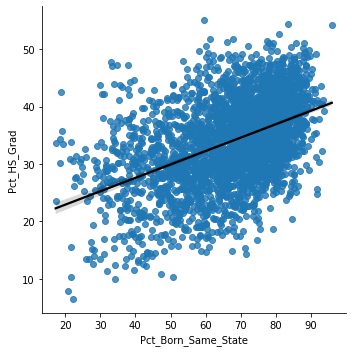

In [44]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Born_Same_State',
    y = 'Pct_HS_Grad',
    line_kws = {'color':'k'}
)

In [45]:
stats.linregress(
    x = counties_df['Pct_Live_Same_House_1YA'].fillna(0),
    y = counties_df['covid_cases_percapita'].fillna(0),
)

LinregressResult(slope=0.0019032334360191752, intercept=0.07717063355953155, rvalue=0.5219102850392067, pvalue=7.9934372527365e-230, stderr=5.41898214928319e-05, intercept_stderr=0.0046287780141535785)

In [46]:
counties_df.head()

,trump_2016,trump_2020,16_20_shift,state,county,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
FIPS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,72.8,71.4,-1.4,Alabama,Autauga,15582.0,210.0,28.7,31.4,28.3,10.9,17.7,87.5,67.1,29.9,32.7,96.2,82.7,1.6,2.9,57982.0,10.6,92.0,12.7,55639.0,23.6,15.3,51.4,78.0,2.9,98.7,0.280055,0.003774
01003,76.5,76.2,-0.3,Alabama,Baldwin,55327.0,669.0,25.5,27.2,31.9,11.2,14.2,88.4,52.2,25.4,50.3,95.0,85.1,0.2,3.9,61756.0,6.9,90.5,6.3,218289.0,21.5,20.5,51.5,87.9,4.6,98.1,0.253458,0.003065
01005,52.1,53.5,1.4,Alabama,Barbour,5467.0,94.0,39.4,35.7,11.6,6.8,18.8,84.7,68.9,30.7,72.8,92.8,64.6,0.0,6.9,34990.0,24.3,89.3,23.8,25026.0,20.9,19.1,47.4,47.9,4.4,98.3,0.218453,0.003756
01007,76.4,78.4,2.0,Alabama,Bibb,6411.0,100.0,28.2,45.1,11.3,6.8,18.1,87.7,84.2,17.2,76.6,97.6,76.1,0.0,7.4,51721.0,18.5,90.9,17.0,22374.0,20.5,16.4,46.3,77.1,2.7,98.8,0.286538,0.004469
01009,89.3,89.6,0.3,Alabama,Blount,14889.0,230.0,23.1,35.1,13.3,7.7,15.0,91.7,79.5,9.0,85.2,92.2,79.6,0.1,5.2,48922.0,10.5,90.0,10.1,57755.0,23.2,18.0,50.3,96.2,9.3,96.8,0.257796,0.003982


Text(21.70625000000001, 0.5, 'covid_cases_percapita')

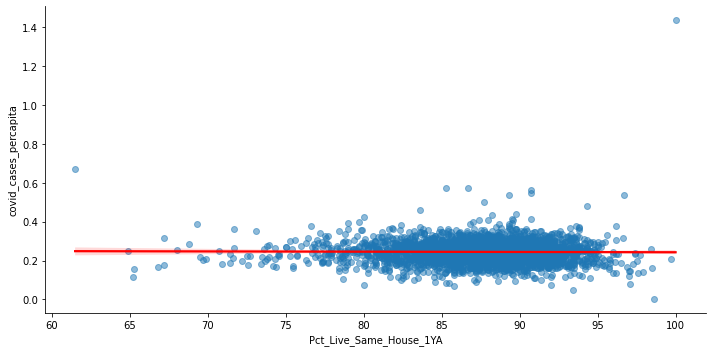

In [47]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Live_Same_House_1YA',
    y = 'covid_cases_percapita',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'r'}
)

plt.xlabel("Pct_Live_Same_House_1YA", size=10)
plt.ylabel("covid_cases_percapita", size=10)

### Negative relationship

In [48]:
stats.linregress(
    x = counties_df['Pct_Assistance'].fillna(0),
    y = counties_df['Pct_Broadband'].fillna(0),
)

LinregressResult(slope=-0.9066381399703991, intercept=86.41558081330632, rvalue=-0.4073139091782909, pvalue=5.436025192500366e-132, stderr=0.03541480804023233, intercept_stderr=0.5445758959856526)

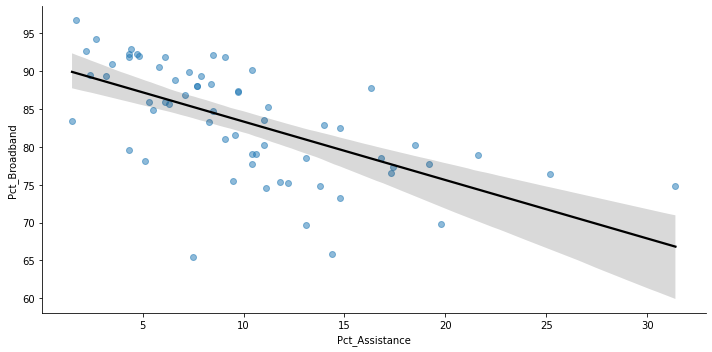

In [49]:
g = sb.lmplot(
    data = co_counties,
    x = 'Pct_Assistance',
    y = 'Pct_Broadband',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

### No relationship

In [50]:
stats.linregress(
    x = counties_df['Pct_Female'].fillna(0),
    y = counties_df['Pct_Hispanic'].fillna(0),
)

LinregressResult(slope=0.20946561788573606, intercept=1.255136340943718, rvalue=0.08867550846833752, pvalue=3.399727952189044e-07, stderr=0.040988978730863525, intercept_stderr=2.0245524639499886)

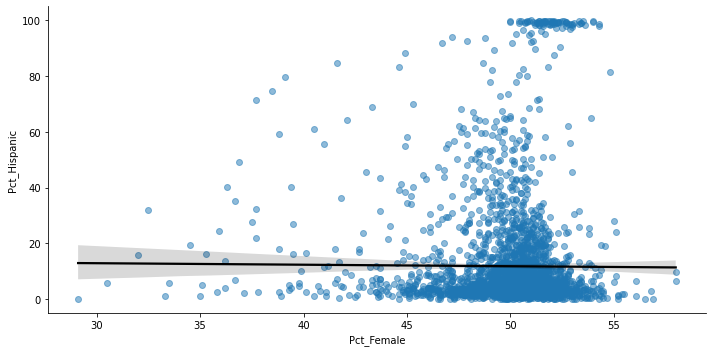

In [51]:
g = sb.lmplot(
    data = counties_df,
    x = 'Pct_Female',
    y = 'Pct_Hispanic',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

### Non-linear relationship

In [52]:
stats.linregress(
    x = counties_df['Median_Income'].fillna(0),
    y = counties_df['Pct_Family_Poverty'].fillna(0),
)

LinregressResult(slope=-0.0002099504405364057, intercept=22.048411822339162, rvalue=-0.4864429635601181, pvalue=1.8391686712121365e-195, stderr=6.569398725347658e-06, intercept_stderr=0.3652644935813921)

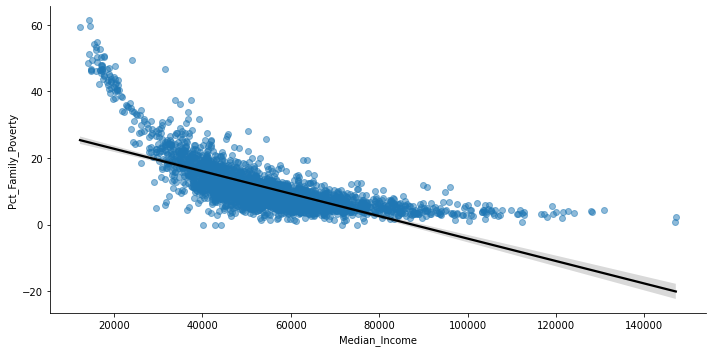

In [53]:
g = sb.lmplot(
    data = counties_df,
    x = 'Median_Income',
    y = 'Pct_Family_Poverty',
    aspect = 2,
    scatter_kws = {'alpha':.5},
    line_kws = {'color':'k'}
)

In [54]:
# Select just a few columns for simplicity
select_columns = ['trump_2020','covid_cases_percapita','Pct_Over_65','Pct_White','Pct_Unemployed','Median_Income','Pct_English_Only']

Make the pairplot.

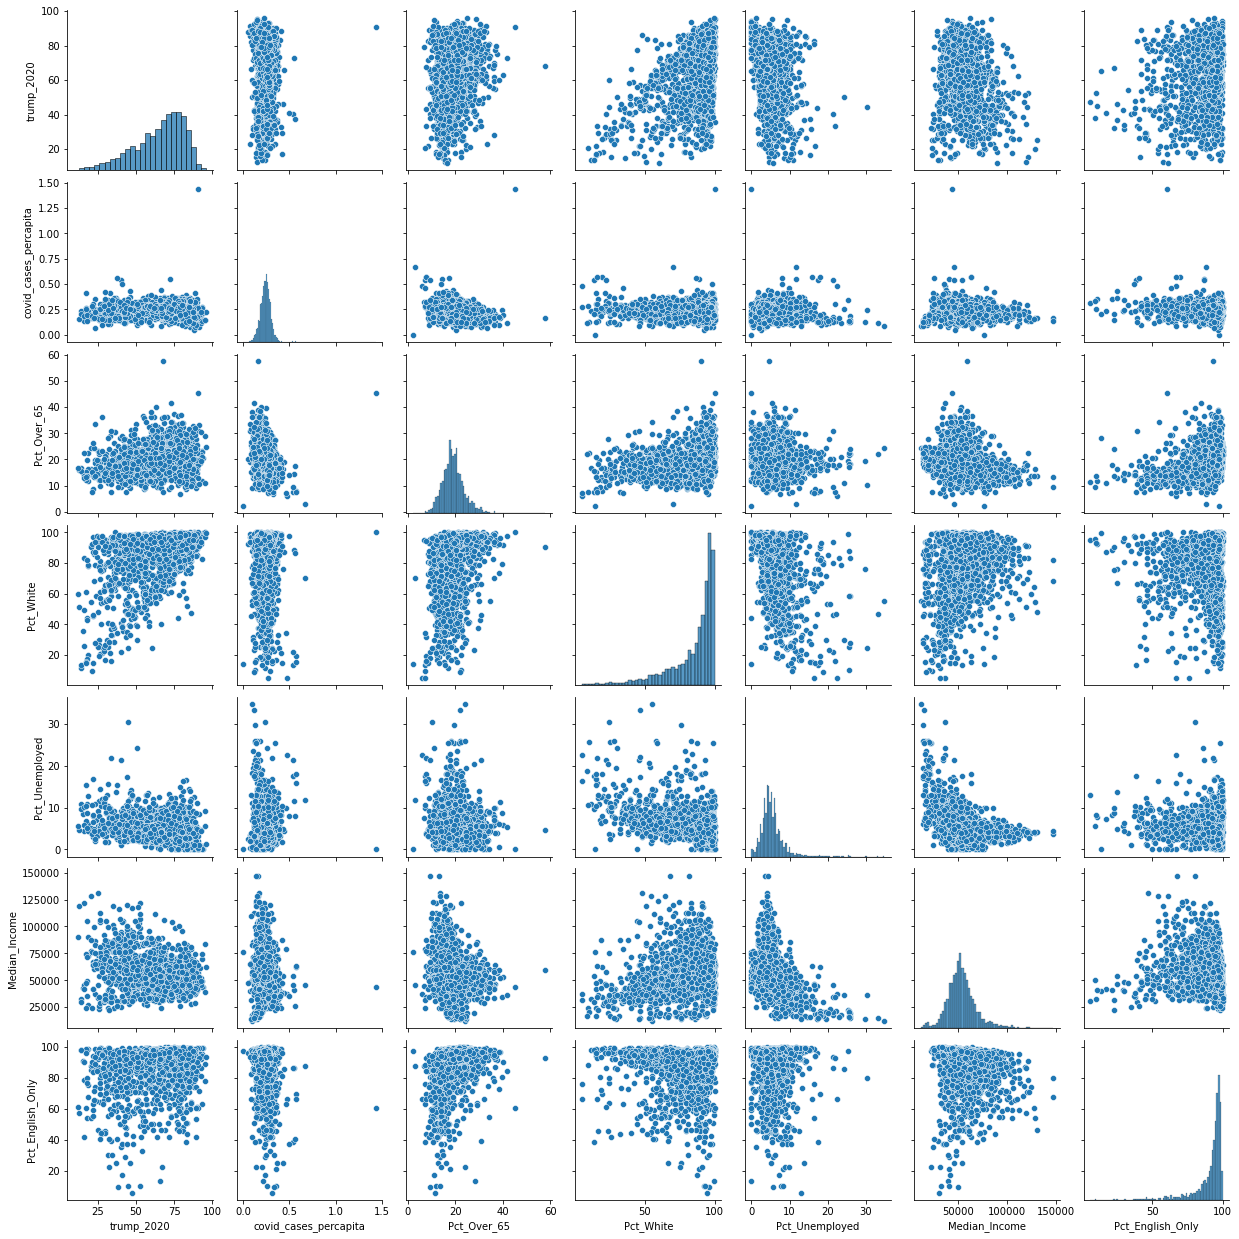

In [55]:
sb.pairplot(
    data = counties_df[select_columns]
)

Customize the plot to:
1. Only visualize below the diagonal (`corner = True`)
2. Estimate a regression line (`kind='reg'`)
3. Customize the regression line color and transparency of the scatter points.

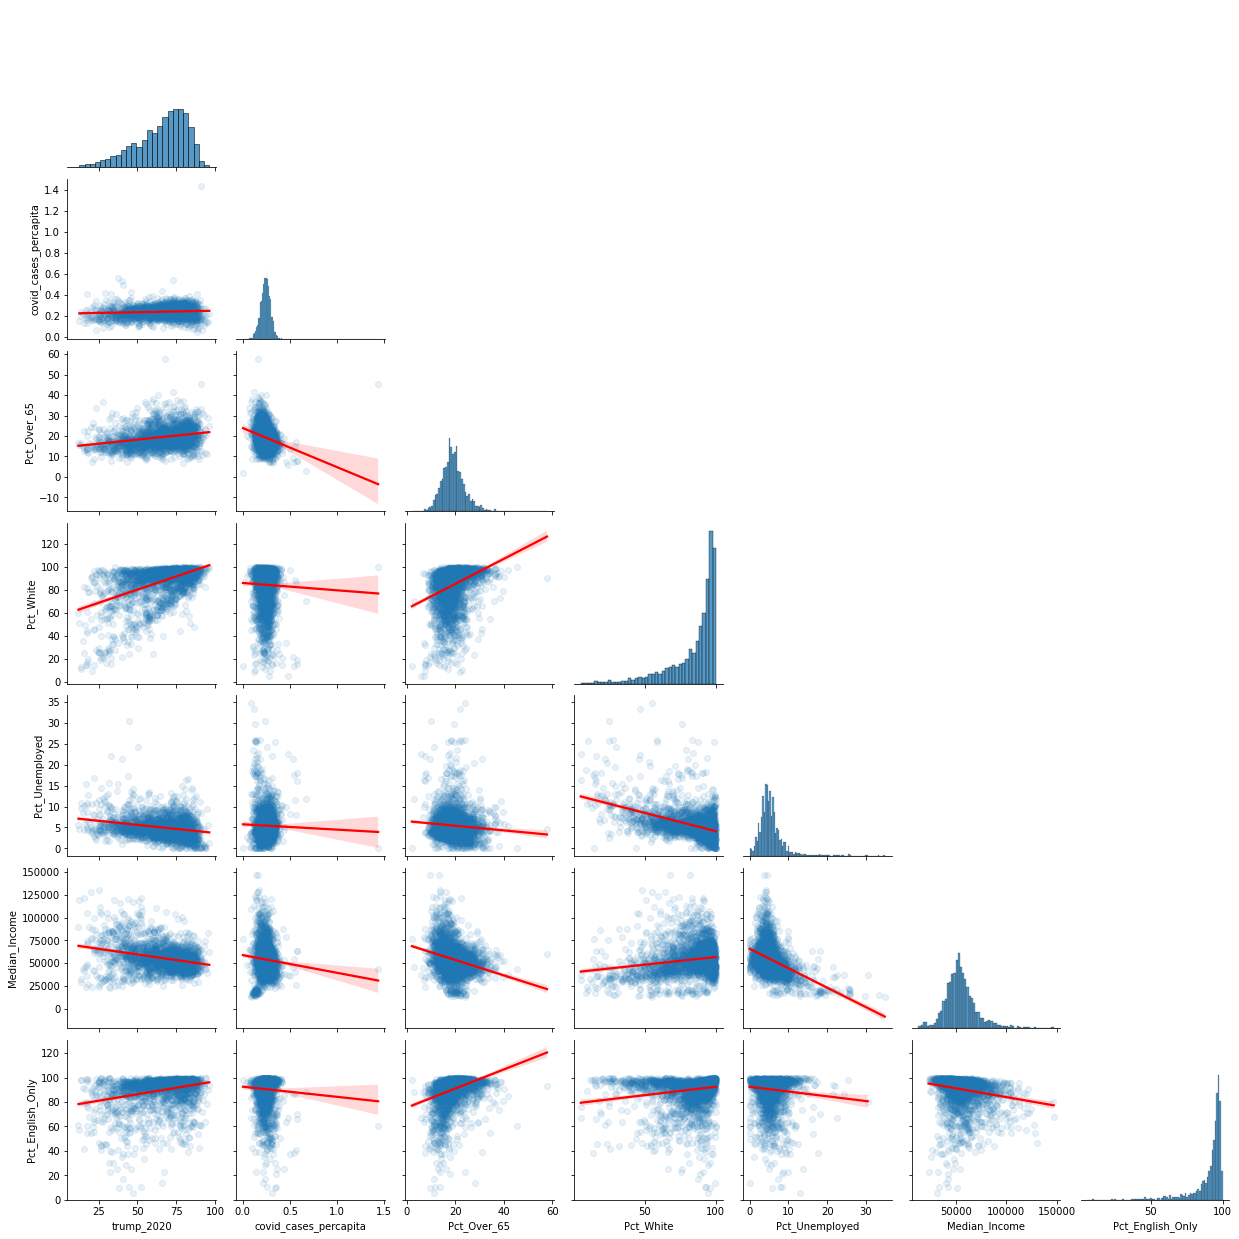

In [56]:
sb.pairplot(
    data = counties_df[select_columns],
    kind = 'reg',
    corner = True,
    plot_kws = {
        'scatter_kws':{
            'alpha':.1
        },
        'line_kws':{
            'color':'red'
        }
    }
)

Alternatively, we could compute the correlation and use Seaborn's `heatmap` ([docs](https://seaborn.pydata.org/generated/seaborn.heatmap.html)) to visualize these values.

In [57]:
counties_corr = counties_df.corr()
counties_corr.head()

,trump_2016,trump_2020,16_20_shift,covid_cases,covid_deaths,Pct_Single_Female,Pct_HS_Grad,Pct_College_Grad,Pct_Veteran,Pct_Disability,Pct_Live_Same_House_1YA,Pct_Born_Same_State,Pct_Foreign_After_2010,Pct_Foreign_Born_LatAm,Pct_English_Only,Pct_Broadband,Pct_Armed_Forces,Pct_Unemployed,Median_Income,Pct_Assistance,Pct_Health_Insurance,Pct_Family_Poverty,Population,Pct_Under_18,Pct_Over_65,Pct_Female,Pct_White,Pct_Hispanic,Pct_Over_18_Citizen,covid_cases_percapita,covid_deaths_percapita
trump_2016,1.000000,0.984394,0.044151,-0.302023,-0.280214,-0.428625,0.453711,-0.488349,0.184005,0.301027,0.197805,0.192612,-0.083157,0.132877,0.318292,-0.171658,-0.073669,-0.225018,-0.244530,-0.156468,-0.130175,-0.067596,-0.350005,0.090338,0.261506,-0.147601,0.535124,-0.183702,0.288920,0.109824,0.316315
trump_2020,0.984394,1.000000,0.219270,-0.325911,-0.309799,-0.417879,0.473399,-0.553983,0.243410,0.285981,0.165778,0.201708,-0.091846,0.184376,0.271707,-0.222320,-0.055181,-0.248578,-0.288587,-0.174237,-0.177570,-0.077824,-0.375342,0.122588,0.263857,-0.178757,0.500744,-0.142100,0.256281,0.078529,0.349028
16_20_shift,0.044151,0.219270,1.000000,-0.071695,-0.075904,-0.140569,0.180611,-0.360587,-0.114868,0.107796,0.079345,0.112394,-0.078848,0.226846,-0.272540,-0.258714,-0.089752,-0.033610,-0.231418,0.148389,-0.168795,0.155107,-0.083783,0.259162,-0.018077,-0.179248,0.149968,0.318139,-0.114745,0.088344,0.121312
covid_cases,-0.302023,-0.325911,-0.071695,1.000000,0.960762,0.095800,-0.274360,0.283238,-0.144518,-0.206985,-0.093210,-0.170857,0.015667,-0.014054,-0.299568,0.231654,0.024181,0.005605,0.233648,-0.057552,0.028760,-0.069449,0.980842,0.047410,-0.199258,0.090491,-0.148281,0.111178,-0.318677,0.032704,-0.120973
covid_deaths,-0.280214,-0.309799,-0.075904,0.960762,1.000000,0.124247,-0.229954,0.236258,-0.131865,-0.172459,-0.072853,-0.148302,0.008455,-0.006642,-0.287941,0.201328,0.013152,0.049905,0.189968,-0.013605,0.015041,-0.034694,0.960859,0.036844,-0.169303,0.107896,-0.161880,0.188675,-0.294005,0.017407,-0.058546


<AxesSubplot:>

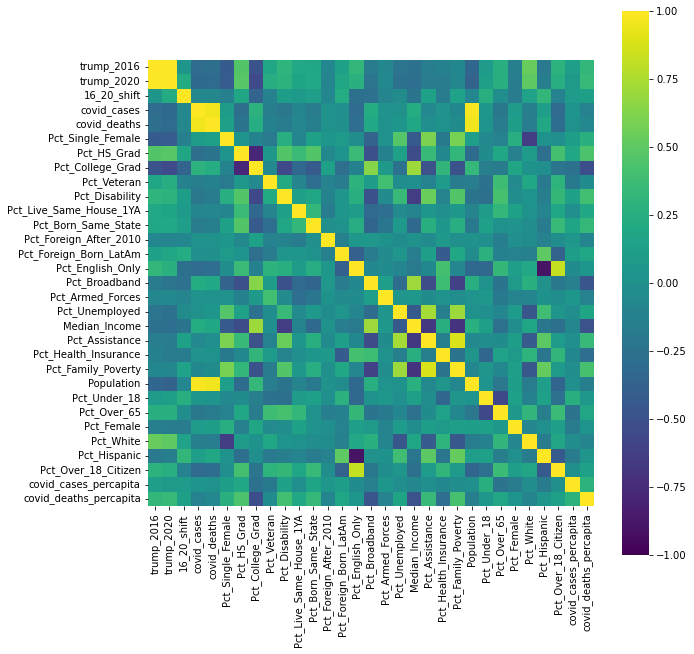

In [58]:
f,ax = plt.subplots(figsize=(10,10))

sb.heatmap(
    data = counties_corr,
    square = True,
    cmap = 'viridis',
    vmin = -1,
    vmax = 1
)

We can use Seaborn's `clustermap` ([docs](https://seaborn.pydata.org/generated/seaborn.clustermap.html)) to re-arrange the rows and columns so that variables with similar correlations are grouped together.

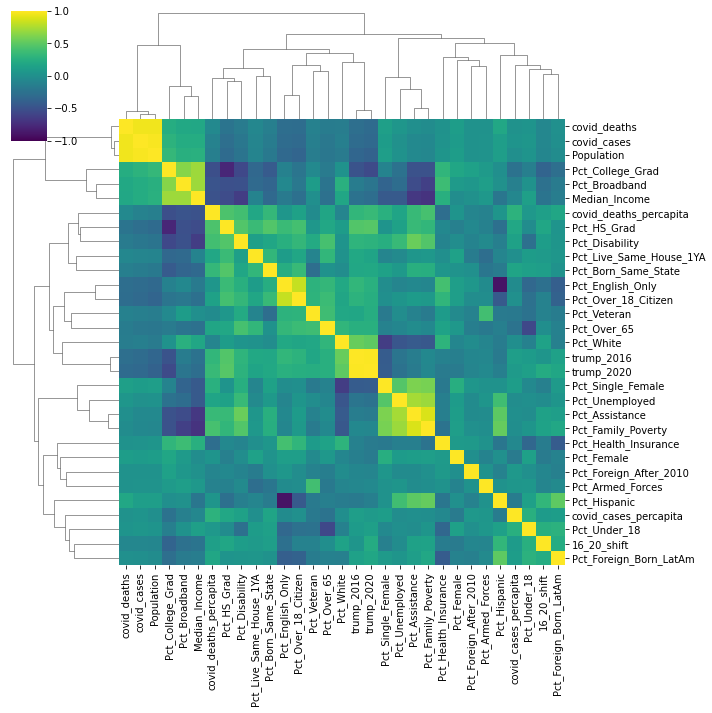

In [59]:
sb.clustermap(
    data = counties_corr,
    cmap = 'viridis',
    vmin = -1,
    vmax = 1
)

## Appendix

### Presidential results

This is data from the MIT Eelection Data and Science Lab: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

In [60]:
county_pres_df = pd.read_csv('countypres_2000-2020.csv',dtype={'county_fips':str})
county_pres_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'countypres_2000-2020.csv'

In [ ]:
c0 = county_pres_df['party'] == 'REPUBLICAN'
c1 = county_pres_df['year'].isin([2016,2020])
c2 = county_pres_df['mode'] == 'TOTAL'
gop_16_20_df = county_pres_df.copy()[c0 & c1 & c2]
gop_16_20_df['Pct'] = (100 * gop_16_20_df['candidatevotes'] / gop_16_20_df['totalvotes']).round(1)
gop_16_20_df['full_county'] = gop_16_20_df['county_name'].str.title() + ' County, ' + gop_16_20_df['state'].str.title()

gop_16_20_df#.pivot(index='county_fips',columns='year',values='Pct')

In [ ]:
fips_state_map = gop_16_20_df[['county_fips','state']].drop_duplicates().sort_values('county_fips').dropna(subset=['county_fips']).set_index('county_fips')
fips_county_map = gop_16_20_df[['county_fips','county_name']].drop_duplicates().sort_values('county_fips').dropna(subset=['county_fips']).set_index('county_fips')

In [ ]:
gop_16_20_pivot = pd.pivot_table(
    data = gop_16_20_df,
#     index = 'full_county',
    index = 'county_fips',
    columns = 'year',
    values = 'Pct',
    aggfunc = 'mean'
)

gop_16_20_pivot.rename(columns = {2016:'trump_2016',2020:'trump_2020'},inplace=True)
gop_16_20_pivot['16_20_shift'] = gop_16_20_pivot['trump_2020'] - gop_16_20_pivot['trump_2016']

gop_16_20_pivot['state'] = fips_state_map
gop_16_20_pivot['state'] = gop_16_20_pivot['state'].str.title()

gop_16_20_pivot['county'] = fips_county_map
gop_16_20_pivot['county'] = gop_16_20_pivot['county'].str.title()


gop_16_20_pivot.head()

### Census

Census tables DP02, DP03, and DP05 from the 5-year American Community Survey: https://data.census.gov/cedsci/table?d=ACS%205-Year%20Estimates%20Data%20Profiles

In [ ]:
dp02_df = pd.read_csv('ACSDP5Y2020.DP02_data_with_overlays_2022-03-21T132159.csv',header=[1],index_col=-2)

dp02_estimate_cols = [col for col in dp02_df.columns if 'Estimate!!' in col]
dp02_percent_cols = [col for col in dp02_df.columns if 'Percent!!' in col]

dp02_estimates_df = dp02_df[dp02_estimate_cols]
dp02_estimates_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp02_estimates_df.columns])

dp02_percent_df = dp02_df[dp02_percent_cols]
dp02_percent_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp02_percent_df.columns])

dp02_percent_df.head()

In [ ]:
dp02_select_cols = pd.DataFrame()

dp02_select_cols['Pct_Single_Female'] = dp02_percent_df.loc[:,('Percent','HOUSEHOLDS BY TYPE','Total households','Female householder, no spouse/partner present',np.nan,np.nan,np.nan)]
dp02_select_cols['Pct_HS_Grad'] = dp02_percent_df.loc[:,('Percent','EDUCATIONAL ATTAINMENT','Population 25 years and over','High school graduate (includes equivalency)')]
dp02_select_cols['Pct_College_Grad'] = dp02_percent_df.loc[:,('Percent','EDUCATIONAL ATTAINMENT','Population 25 years and over','Bachelor\'s degree or higher')]
dp02_select_cols['Pct_Veteran'] = dp02_percent_df.loc[:,('Percent','VETERAN STATUS','Civilian population 18 years and over','Civilian veterans')]
dp02_select_cols['Pct_Disability'] = dp02_percent_df.loc[:,('Percent','DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION','Total Civilian Noninstitutionalized Population','With a disability')]
dp02_select_cols['Pct_Live_Same_House_1YA'] = dp02_percent_df.loc[:,('Percent','RESIDENCE 1 YEAR AGO','Population 1 year and over','Same house')]
dp02_select_cols['Pct_Born_Same_State'] = dp02_percent_df.loc[:,('Percent','PLACE OF BIRTH','Total population','Native','Born in United States','State of residence')]
dp02_select_cols['Pct_Foreign_After_2010'] = dp02_percent_df.loc[:,('Percent','YEAR OF ENTRY','Population born outside the United States','Foreign born','Entered 2010 or later')]
dp02_select_cols['Pct_Foreign_Born_LatAm'] = dp02_percent_df.loc[:,('Percent','WORLD REGION OF BIRTH OF FOREIGN BORN','Foreign-born population, excluding population born at sea','Latin America')]
dp02_select_cols['Pct_English_Only'] = dp02_percent_df.loc[:,('Percent','LANGUAGE SPOKEN AT HOME','Population 5 years and over','English only')]
dp02_select_cols['Pct_Broadband'] = dp02_percent_df.loc[:,('Percent','COMPUTERS AND INTERNET USE','Total households','With a broadband Internet subscription')]
dp02_select_cols.head()

In [ ]:
dp03_df = pd.read_csv('ACSDP5Y2020.DP03_data_with_overlays_2022-03-21T131620.csv',header=[1],index_col=-2)

dp03_estimate_cols = [col for col in dp03_df.columns if 'Estimate!!' in col]
dp03_percent_cols = [col for col in dp03_df.columns if 'Percent!!' in col]

dp03_estimates_df = dp03_df[dp03_estimate_cols]
dp03_estimates_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp03_estimates_df.columns])

dp03_percent_df = dp03_df[dp03_percent_cols]
dp03_percent_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp03_percent_df.columns])

dp03_percent_df.head()

In [ ]:
dp03_select_cols = pd.DataFrame()

dp03_select_cols['Pct_Armed_Forces'] = dp03_percent_df.loc[:,('Percent','EMPLOYMENT STATUS','Population 16 years and over','In labor force','Armed Forces')]
dp03_select_cols['Pct_Unemployed'] = dp03_percent_df.loc[:,('Percent','EMPLOYMENT STATUS','Civilian labor force','Unemployment Rate')]
dp03_select_cols['Median_Income'] = dp03_estimates_df.loc[:,('Estimate','INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)','Total households','Median household income (dollars)')]
dp03_select_cols['Pct_Assistance'] = dp03_percent_df.loc[:,('Percent','INCOME AND BENEFITS (IN 2020 INFLATION-ADJUSTED DOLLARS)','Total households','With Food Stamp/SNAP benefits in the past 12 months')]
dp03_select_cols['Pct_Health_Insurance'] = dp03_percent_df.loc[:,('Percent','HEALTH INSURANCE COVERAGE','Civilian noninstitutionalized population','With health insurance coverage',np.nan,np.nan,np.nan)]
dp03_select_cols['Pct_Family_Poverty'] = dp03_percent_df.loc[:,('Percent','PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL','All families',np.nan)]

dp03_select_cols.head()

In [ ]:
dp05_df = pd.read_csv('ACSDP5Y2020.DP05_data_with_overlays_2022-03-21T130748.csv',header=[1],index_col=-2)

dp05_estimate_cols = [col for col in dp05_df.columns if 'Estimate!!' in col]
dp05_percent_cols = [col for col in dp05_df.columns if 'Percent!!' in col]

dp05_estimates_df = dp05_df[dp05_estimate_cols]
dp05_estimates_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp05_estimates_df.columns])

dp05_percent_df = dp05_df[dp05_percent_cols]
dp05_percent_df.columns = pd.MultiIndex.from_tuples([tuple(col.split('!!')) for col in dp05_percent_df.columns])

dp05_percent_df.head()

In [ ]:
dp05_select_cols = pd.DataFrame()
dp05_select_cols['Population'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population',np.nan,np.nan,np.nan)]
dp05_select_cols['Pct_Under_18'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','Under 18 years')]
dp05_select_cols['Pct_Over_65'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','65 years and over',np.NaN,np.NaN)]
dp05_select_cols['Pct_Female'] = dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','Female')]
dp05_select_cols['Pct_White'] = dp05_percent_df.loc[:,('Percent','Race alone or in combination with one or more other races','Total population','White')]
dp05_select_cols['Pct_Hispanic'] = dp05_percent_df.loc[:,('Percent','HISPANIC OR LATINO AND RACE','Total population','Hispanic or Latino (of any race)',np.NaN,np.NaN)]
dp05_select_cols['Pct_Over_18_Citizen'] = (100 * dp05_percent_df.loc[:,('Percent','CITIZEN, VOTING AGE POPULATION','Citizen, 18 and over population',np.NaN,np.NaN,np.NaN)] / dp05_percent_df.loc[:,('Percent','SEX AND AGE','Total population','18 years and over.1',np.NaN,np.NaN)]).round(1)

dp05_select_cols.head()


In [ ]:
census_df = pd.concat([dp02_select_cols,dp03_select_cols,dp05_select_cols],axis=1)
census_df.index = census_df.index.str.slice(-5)
census_df.head()

In [61]:
census_df['Pct_Foreign_After_2010'].value_counts()

NameError: name 'census_df' is not defined

In [62]:
allcovid_df = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties-recent.csv',parse_dates=['date'],dtype={'fips':str})
allcovid_df['County Name'] = allcovid_df['county'] + ' County, ' + allcovid_df['state']
allcovid_df.tail()

,date,county,state,fips,cases,deaths,County Name
97696,2023-03-23,Sweetwater,Wyoming,56037,12519,139.0,"Sweetwater County, Wyoming"
97697,2023-03-23,Teton,Wyoming,56039,12150,16.0,"Teton County, Wyoming"
97698,2023-03-23,Uinta,Wyoming,56041,6416,43.0,"Uinta County, Wyoming"
97699,2023-03-23,Washakie,Wyoming,56043,2700,51.0,"Washakie County, Wyoming"
97700,2023-03-23,Weston,Wyoming,56045,1906,23.0,"Weston County, Wyoming"


In [ ]:
recent_covid_df = allcovid_df[allcovid_df['date'] == allcovid_df['date'].max()].set_index('fips')[['cases','deaths']]
# recent_covid_df = allcovid_df[allcovid_df['date'] == allcovid_df['date'].max()].set_index('County Name')[['cases','deaths']]
recent_covid_df.columns = ['covid_cases','covid_deaths']
recent_covid_df.head()

### Join together

In [ ]:
gop_16_20_pivot.shape, census_df.shape, recent_covid_df.shape

In [ ]:
len(sorted(set(census_df.index) - set(gop_16_20_pivot.index))), len(set(gop_16_20_pivot.index) - set(census_df.index))

In [ ]:
len(set(recent_covid_df.index) - set(gop_16_20_pivot.index)), len(set(gop_16_20_pivot.index) - set(recent_covid_df.index))

In [ ]:
len(set(recent_covid_df.index) - set(census_df.index)), len(set(census_df.index) - set(recent_covid_df.index))

In [ ]:
gop_16_20_pivot.head()

In [ ]:
census_df.head()

In [ ]:
recent_covid_df.head()

In [ ]:
merged_df = pd.merge(gop_16_20_pivot,recent_covid_df,left_index=True,right_index=True,how='outer')
print(merged_df.shape)
merged_df = pd.merge(merged_df,census_df,left_index=True,right_index=True,how='left')
print(merged_df.shape)

merged_df['covid_cases_percapita'] = merged_df['covid_cases'] / merged_df['Population']
merged_df['covid_deaths_percapita'] = merged_df['covid_deaths'] / merged_df['Population']

merged_df.to_csv('us_counties.csv')

merged_df.head()

In [ ]:
corr_df = merged_df.corr()
corr_s = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(bool)).stack()

corr_s[(corr_s > -0.01 ) & (corr_s < .01)]